## 🗺️ Nashville Housing Storyline: “What Shapes a Home’s Value?”
**Author:** _salma mohammed_  
**Date:** _June 2025_

## 📥 Data Loading & Initial Exploration

In [1]:

#!pip install --upgrade plotly
#!pip install seaborn
#!pip install matplotlib
#pip install -U kaleido

In [2]:
# 🔧 Core libraries
import pandas as pd
import numpy as np

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [3]:
df = pd.read_excel(r"D:\salma\analyst\python\Nashville Housing Storyline\Nashville Housing Data cleaned.xlsx", engine='openpyxl') 
# reading the excel file


## 🧹 Data Cleaning

In [4]:
df.info()        # Check column types and non-null counts



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48559 entries, 0 to 48558
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   UniqueID           48559 non-null  int64         
 1   ParcelID           48559 non-null  object        
 2   LandUse            48559 non-null  object        
 3   SalePrice          48559 non-null  int64         
 4   LegalReference     48554 non-null  object        
 5   SoldAsVacant       48559 non-null  object        
 6   OwnerName          48559 non-null  object        
 7   Acreage            48559 non-null  float64       
 8   LandValue          48559 non-null  int64         
 9   BuildingValue      48559 non-null  int64         
 10  TotalValue         48559 non-null  int64         
 11  YearBuilt          48559 non-null  int64         
 12  Bedrooms           48559 non-null  int64         
 13  FullBath           48559 non-null  int64         
 14  HalfBa

In [5]:
df.describe()   # Get summary statistics for numerical columns

,UniqueID,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,SaleDateconverted
count,48559.000000,4.855900e+04,48559.000000,4.855900e+04,4.855900e+04,4.855900e+04,48559.000000,48559.000000,48559.000000,48559.000000,48559
mean,26974.542824,3.160040e+05,0.239912,3.238675e+04,7.236790e+04,1.059264e+05,842.911860,1.325254,0.807059,0.118886,2015-01-07 06:21:42.876912896
min,0.000000,5.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2013-01-02 00:00:00
25%,12746.500000,1.312530e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2014-03-03 00:00:00
50%,26245.000000,1.999000e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2015-01-20 00:00:00
75%,40841.500000,3.200000e+05,0.260000,2.700000e+04,1.029000e+05,1.366000e+05,1956.000000,3.000000,2.000000,0.000000,2015-11-20 00:00:00
max,56635.000000,1.410000e+07,160.060000,2.772000e+06,1.297180e+07,1.394040e+07,2017.000000,11.000000,10.000000,3.000000,2019-12-13 00:00:00
std,16333.283033,7.278410e+05,1.166960,8.139534e+04,1.602069e+05,2.232372e+05,971.912018,1.628491,1.122536,0.345389,NaN


In [6]:
df.isnull().sum()  
# Check for missing values in each column



UniqueID             0
ParcelID             0
LandUse              0
SalePrice            0
LegalReference       5
SoldAsVacant         0
OwnerName            0
Acreage              0
LandValue            0
BuildingValue        0
TotalValue           0
YearBuilt            0
Bedrooms             0
FullBath             0
HalfBath             0
SaleDateconverted    0
StreetAddress        0
City                 0
Owner_Address        0
OwnerCity            0
OwnerState           0
dtype: int64

In [7]:
df[df['LegalReference'].isnull()]
# Display rows where 'LegalReference' is null to understand the context of missing values

,UniqueID,ParcelID,LandUse,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,LandValue,BuildingValue,...,YearBuilt,Bedrooms,FullBath,HalfBath,SaleDateconverted,StreetAddress,City,Owner_Address,OwnerCity,OwnerState
16551,33765,081 08 4B 014.00,RESIDENTIAL CONDO,325000,NaN,No,Unknown,0.00,0,0,...,0,0,0,0,2015-06-03,710 BUCHANAN ST,NASHVILLE,Unknown,Unknown,Pending Update
28990,20017,083 01 0D 001.00,RESIDENTIAL CONDO,419240,NaN,No,Unknown,0.00,0,0,...,0,0,0,0,2014-08-29,1118 A SHARPE AVE,NASHVILLE,Unknown,Unknown,Pending Update
32202,17927,104 16 0 287.00,SINGLE FAMILY,695150,NaN,No,"ROGAN, JOHN & VIRGINIA",0.11,180000,326300,...,1940,3,4,0,2014-07-30,2402 OAKLAND AVE,NASHVILLE,NASHVILLE,2402 OAKLAND AVE,TN
39070,43449,136 07 0 030.00,SINGLE FAMILY,160000,NaN,No,"SANDERS, DAVID E.",0.32,27000,86300,...,1970,3,2,0,2016-01-14,117 TIMBER RIDGE DR,NASHVILLE,NASHVILLE,117 TIMBER RIDGE DR,TN
47801,18010,117 09 0 078.00,SINGLE FAMILY,542000,NaN,No,"ADRIAN, JAMES L. & HARRIET M.",0.87,168000,163100,...,1951,2,1,1,2014-07-30,2872 SUGARTREE RD,NASHVILLE,NASHVILLE,2872 SUGARTREE RD,TN


In [8]:
df['LegalReference'] = df['LegalReference'].fillna('Unknown')
# Fill missing LegalReference values with 'Unknown'



## 📊 Exploratory Data Analysis


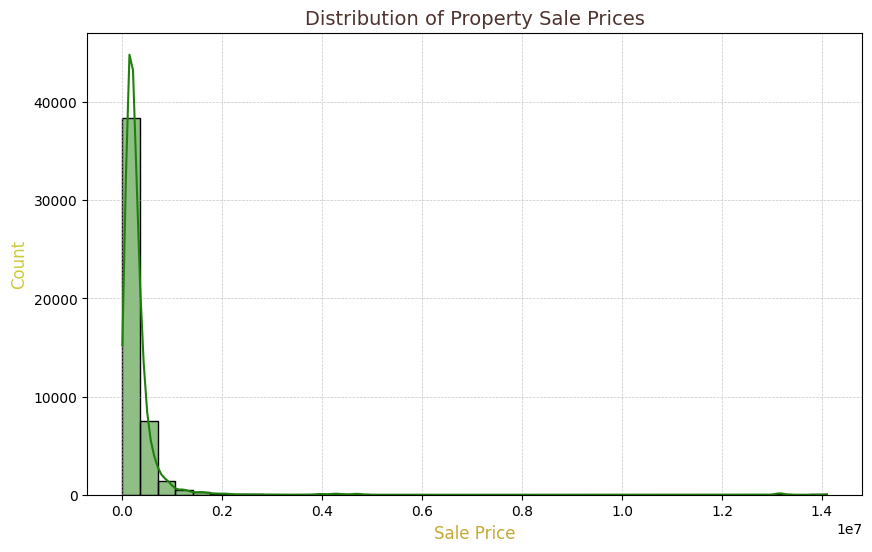

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], bins=40, kde=True, color="#20800C")  
plt.title('Distribution of Property Sale Prices', fontsize=14, color='#4E342E')  
plt.xlabel('Sale Price', fontsize=12, color="#C4A935")
plt.ylabel('Count', fontsize=12, color="#CCCA40")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()
# Plot the distribution of property sale prices .


In [10]:
# Ensure SaleDateconverted is datetime
df['SaleDateconverted'] = pd.to_datetime(df['SaleDateconverted'], errors='coerce')
# Convert SaleDateconverted to datetime format

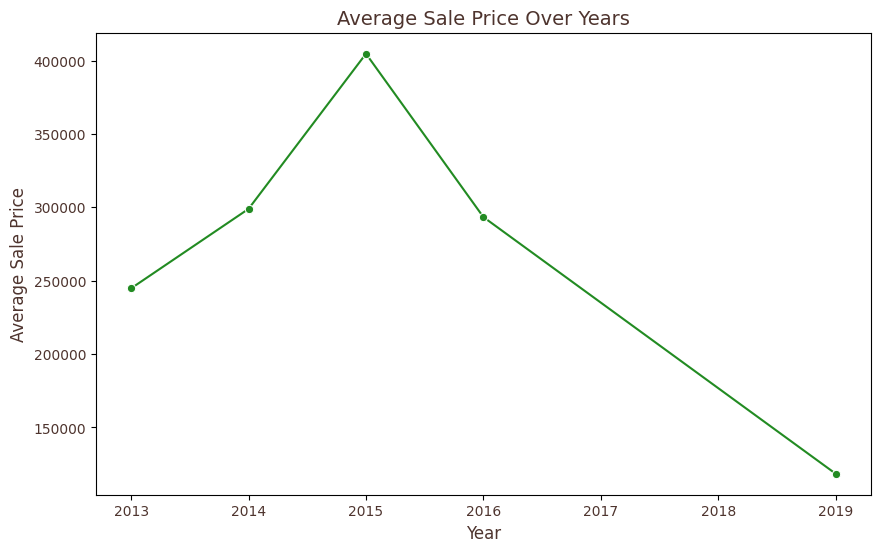

In [11]:
# Create Year column
df['SaleYear'] = df['SaleDateconverted'].dt.year

# Compute average sale price by year
avg_price_by_year = df.groupby('SaleYear')['SalePrice'].mean().reset_index()

# Plotting average sale price over the years
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_price_by_year, x='SaleYear', y='SalePrice',
             marker='o', color='#228B22')  

plt.title('Average Sale Price Over Years', fontsize=14, color='#4E342E') 
plt.xlabel('Year', fontsize=12, color='#4E342E')
plt.ylabel('Average Sale Price', fontsize=12, color='#4E342E')
plt.xticks(color='#4E342E')
plt.yticks(color='#4E342E')
plt.show()
# Plotting the average sale price by year using Plotly


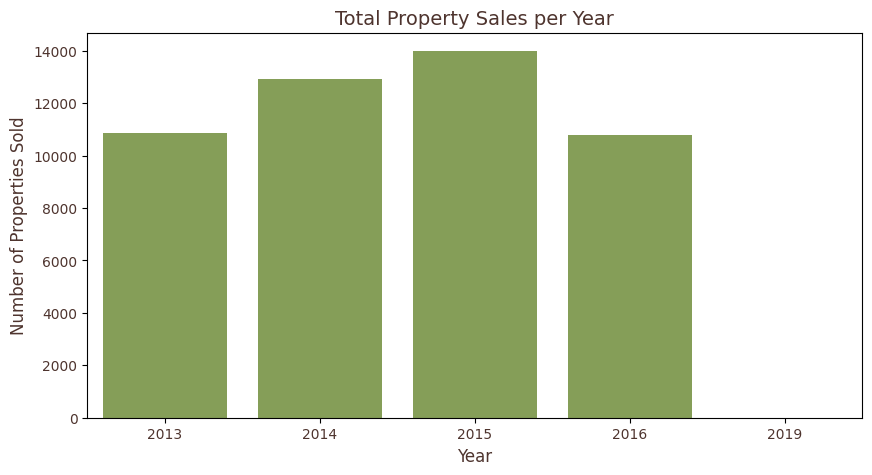

In [12]:
# Count sales per year
sales_count_by_year = df['SaleYear'].value_counts().sort_index()

# Plot with Earth Tone palette
plt.figure(figsize=(10,5))
sns.barplot(x=sales_count_by_year.index, y=sales_count_by_year.values, color="#88AA4C") 
plt.title('Total Property Sales per Year', fontsize=14, color='#4E342E')  
plt.xlabel('Year', fontsize=12, color='#4E342E')
plt.ylabel('Number of Properties Sold', fontsize=12, color='#4E342E')
plt.xticks(color='#4E342E')
plt.yticks(color='#4E342E')
plt.show()
# Count and visualize total property sales per year to assess market activity over time.
# Uses an Earth-tone palette for thematic consistency with previous visuals.




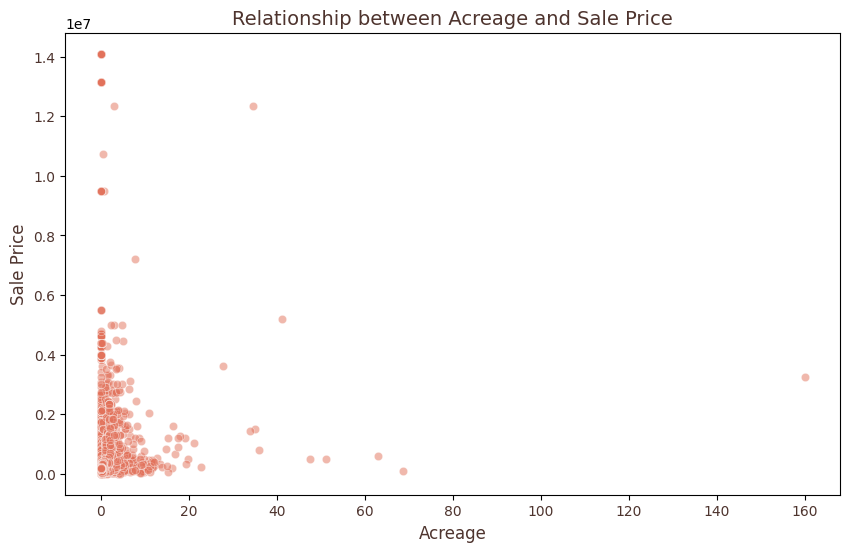

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Acreage', y='SalePrice', data=df, alpha=0.5, color='#E2725B')  
plt.title('Relationship between Acreage and Sale Price', fontsize=14, color='#4E342E')
plt.xlabel('Acreage', fontsize=12, color='#4E342E')
plt.ylabel('Sale Price', fontsize=12, color='#4E342E')
plt.xticks(color='#4E342E')
plt.yticks(color='#4E342E')
plt.show()
# Visualize the relationship between lot size (Acreage) and Sale Price 
# to identify potential patterns or pricing trends in larger properties

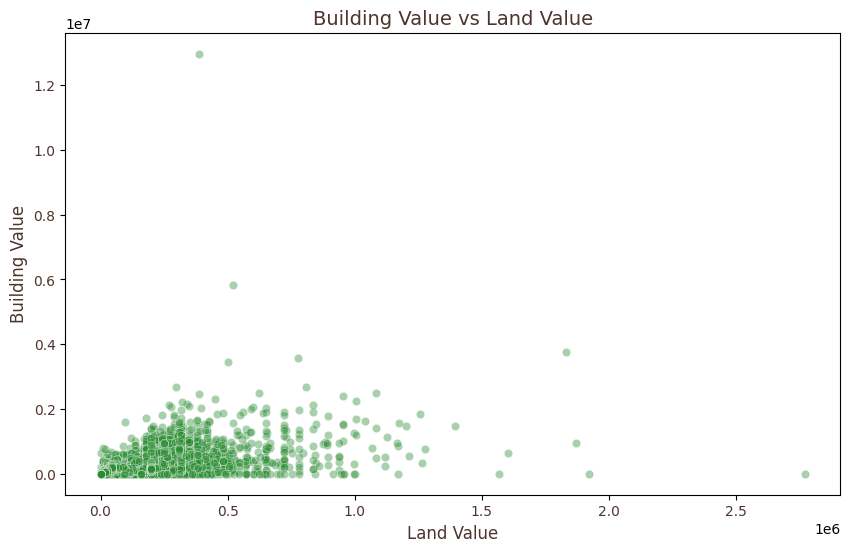

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='LandValue', y='BuildingValue', data=df, alpha=0.4, color="#288B30")  
plt.title('Building Value vs Land Value', fontsize=14, color='#4E342E')
plt.xlabel('Land Value', fontsize=12, color='#4E342E')
plt.ylabel('Building Value', fontsize=12, color='#4E342E')
plt.xticks(color='#4E342E')
plt.yticks(color='#4E342E')
plt.show()
# Explore the correlation between land value and building value.
# This scatter plot reveals whether higher land value typically corresponds to higher investment in building structures.


In [15]:
# Compute correlation matrix for all numeric features to identify linear relationships and potential multicollinearity
corr = df.corr(numeric_only=True)

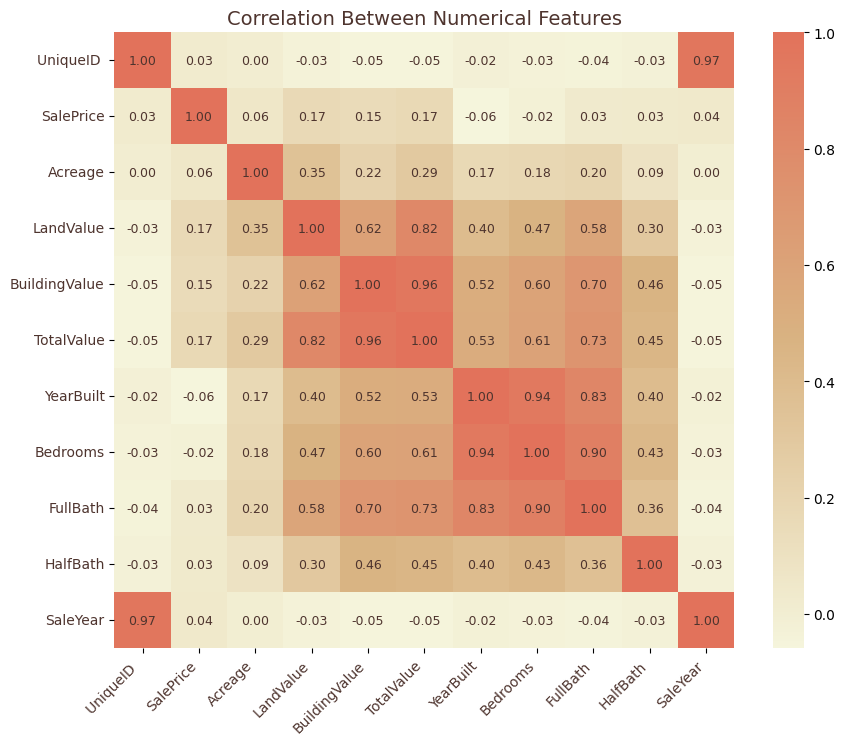

In [16]:
from matplotlib.colors import LinearSegmentedColormap

# Define a soft Earth Tone colormap
light_earth_cmap = LinearSegmentedColormap.from_list(
    "LightEarth",
    ['#F5F5DC', '#D9B382', '#E2725B'],  # Beige to Sandstone to Terracotta
    N=256
)

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap=light_earth_cmap, fmt=".2f",
            annot_kws={"size": 9, "color": '#4E342E'})  # Deep Brown text
plt.title('Correlation Between Numerical Features', fontsize=14, color='#4E342E')
plt.xticks(color='#4E342E', rotation=45, ha='right')
plt.yticks(color='#4E342E')
plt.show()
# Create a custom Earth-tone colormap for a warm, cohesive aesthetic.
# Visualize the correlation matrix between numerical features to uncover linear relationships,
# using soft tones and styled annotations for portfolio-ready clarity.

C:\Users\compu\AppData\Local\Temp\ipykernel_15816\1715638978.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SoldAsVacant', data=df, palette=['#556B2F', '#E2725B'])


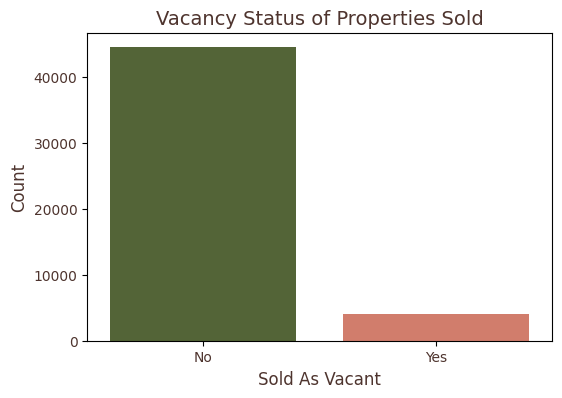

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='SoldAsVacant', data=df, palette=['#556B2F', '#E2725B'])  
plt.title('Vacancy Status of Properties Sold', fontsize=14, color='#4E342E')  
plt.xlabel('Sold As Vacant', fontsize=12, color='#4E342E')
plt.ylabel('Count', fontsize=12, color='#4E342E')
plt.xticks(color='#4E342E')
plt.yticks(color='#4E342E')
plt.show()
# Visualize the distribution of properties sold as vacant versus occupied.


C:\Users\compu\AppData\Local\Temp\ipykernel_15816\3914959057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SoldAsVacant', y='SalePrice', data=df,


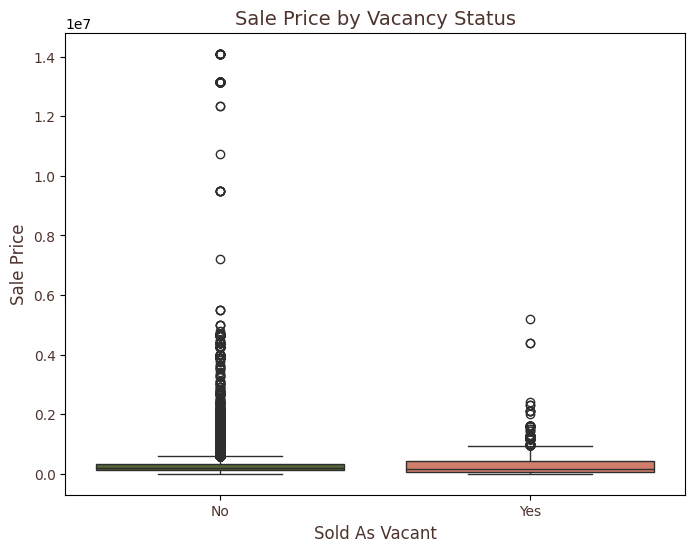

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x='SoldAsVacant', y='SalePrice', data=df,
            palette={'Yes': '#E2725B', 'No': '#556B2F'})  # Terracotta and Olive Green
plt.title('Sale Price by Vacancy Status', fontsize=14, color='#4E342E')  # Deep Brown
plt.xlabel('Sold As Vacant', fontsize=12, color='#4E342E')
plt.ylabel('Sale Price', fontsize=12, color='#4E342E')
plt.xticks(color='#4E342E')
plt.yticks(color='#4E342E')
plt.show()

# Visualize the distribution of sale prices for properties sold as vacant versus occupied.

C:\Users\compu\AppData\Local\Temp\ipykernel_15816\2396902043.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bracket_summary = df.groupby('ValueBracket')[['LandValue', 'BuildingValue']].sum()


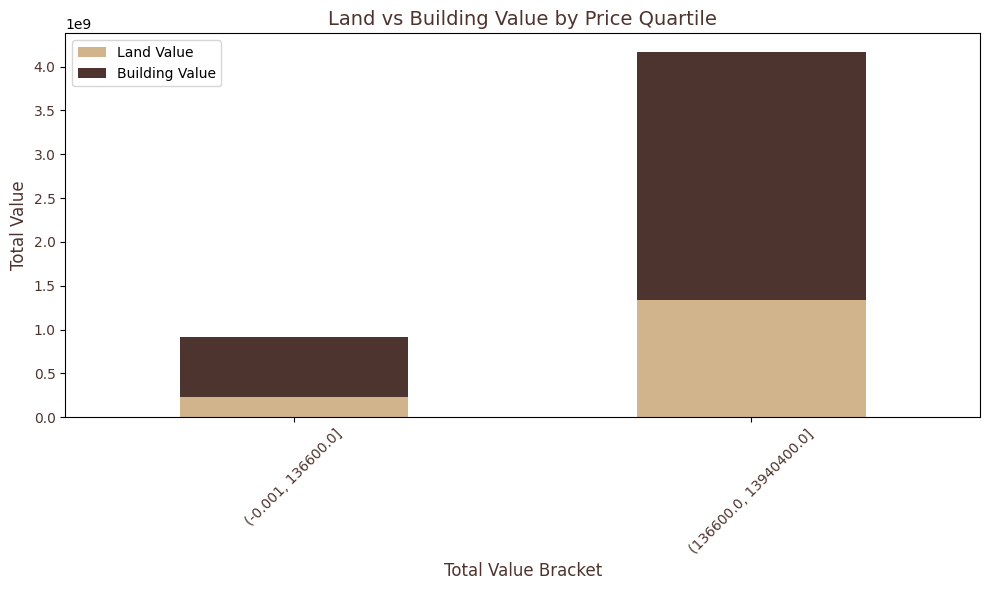

In [20]:
# Create a new column for total value
earth_colors = ['#D2B48C', '#4E342E']  

# Calculate total value as sum of land and building values
df['ValueBracket'] = pd.qcut(df['TotalValue'], q=4, duplicates='drop')
bracket_summary = df.groupby('ValueBracket')[['LandValue', 'BuildingValue']].sum()

bracket_summary.plot(kind='bar', stacked=True, figsize=(10,6), color=earth_colors)
plt.title('Land vs Building Value by Price Quartile', fontsize=14, color='#4E342E')
plt.xlabel('Total Value Bracket', fontsize=12, color='#4E342E')
plt.ylabel('Total Value', fontsize=12, color='#4E342E')
plt.xticks(color='#4E342E', rotation=45)
plt.yticks(color='#4E342E')
plt.legend(labels=['Land Value', 'Building Value'], loc='upper left')
plt.tight_layout()
plt.show()
# Visualize the distribution of land and building values across different total value brackets.


In [21]:
df_filtered = df[(df['YearBuilt'] >= 1875) & (df['YearBuilt'] <= 2025)]
# Create a scatter plot to visualize the relationship between year built and sale price


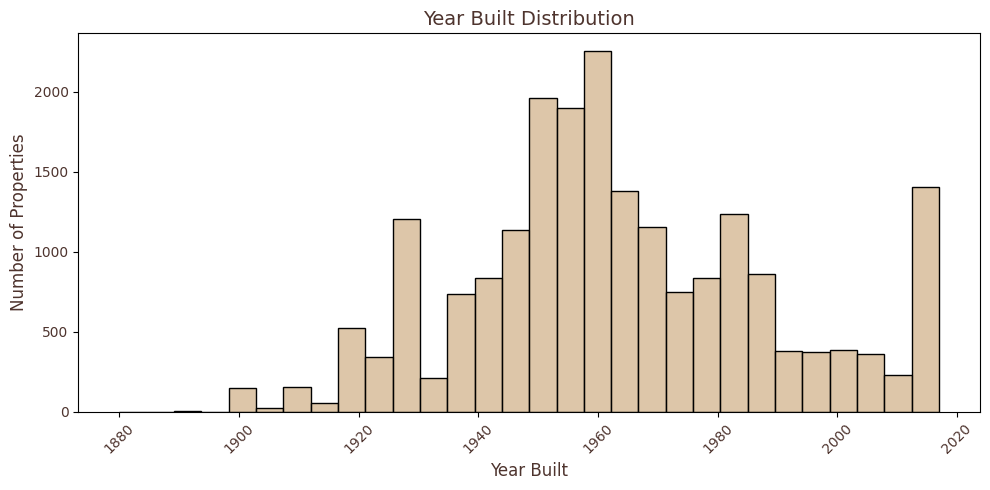

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df_filtered['YearBuilt'], bins=30, color='#D2B48C')  # Wheat tone
plt.title('Year Built Distribution', fontsize=14, color='#4E342E')
plt.xlabel('Year Built', fontsize=12, color='#4E342E')
plt.ylabel('Number of Properties', fontsize=12, color='#4E342E')
plt.xticks(color='#4E342E', rotation=45)
plt.yticks(color='#4E342E')
plt.tight_layout()
plt.show()
# Visualize the distribution of properties built over time

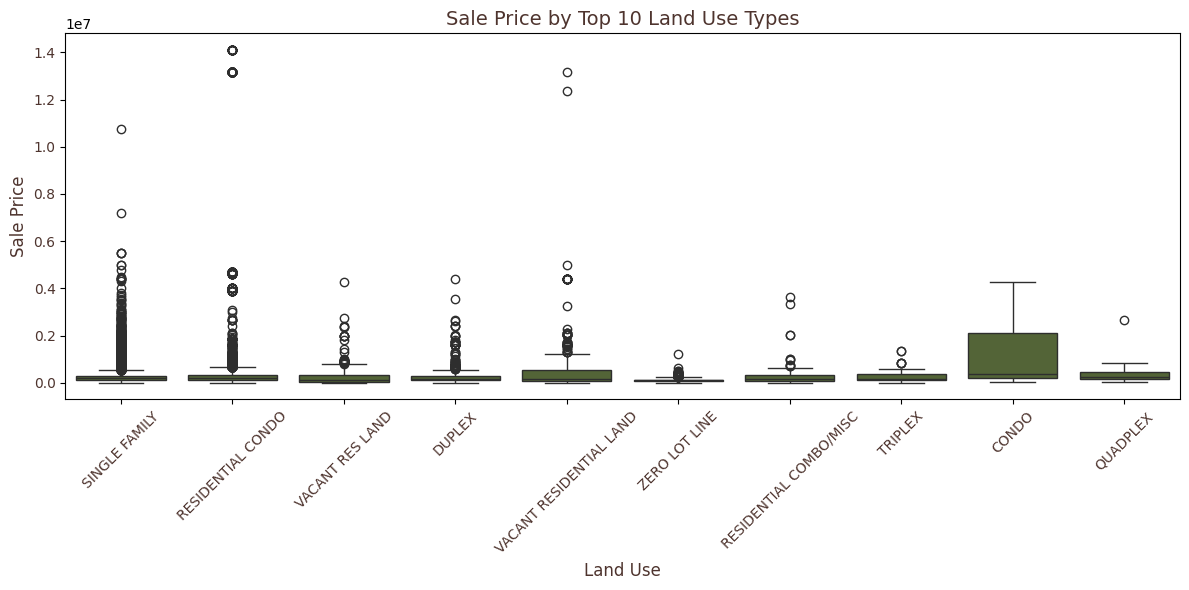

In [23]:
top_landuses = df['LandUse'].value_counts().nlargest(10).index
filtered_df = df[df['LandUse'].isin(top_landuses)]

plt.figure(figsize=(12,6))
sns.boxplot(data=filtered_df, x='LandUse', y='SalePrice', color='#556B2F')  
plt.xticks(rotation=45, color='#4E342E')
plt.yticks(color='#4E342E')
plt.title('Sale Price by Top 10 Land Use Types', fontsize=14, color='#4E342E')
plt.xlabel('Land Use', fontsize=12, color='#4E342E')
plt.ylabel('Sale Price', fontsize=12, color='#4E342E')
plt.tight_layout()
plt.show()
# Visualize the sale price distribution across the top 10 land use types to identify pricing trends


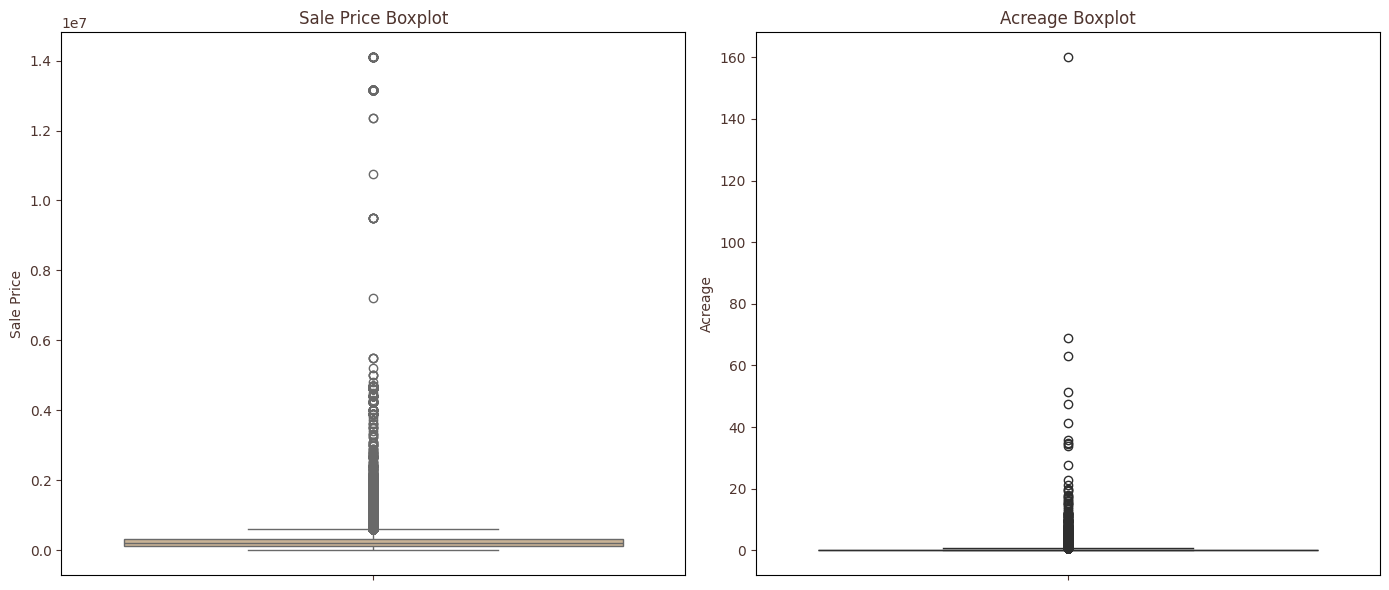

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.boxplot(y=df['SalePrice'], color='#D2B48C', ax=axes[0])
axes[0].set_title('Sale Price Boxplot', fontsize=12, color='#4E342E')
axes[0].set_ylabel('Sale Price', color='#4E342E')

sns.boxplot(y=df['Acreage'], color='#556B2F', ax=axes[1])
axes[1].set_title('Acreage Boxplot', fontsize=12, color='#4E342E')
axes[1].set_ylabel('Acreage', color='#4E342E')

for ax in axes:
    ax.tick_params(colors='#4E342E')

plt.tight_layout()
plt.show()
# Visualize the distribution of sale prices and acreage using boxplots to identify outliers and spread

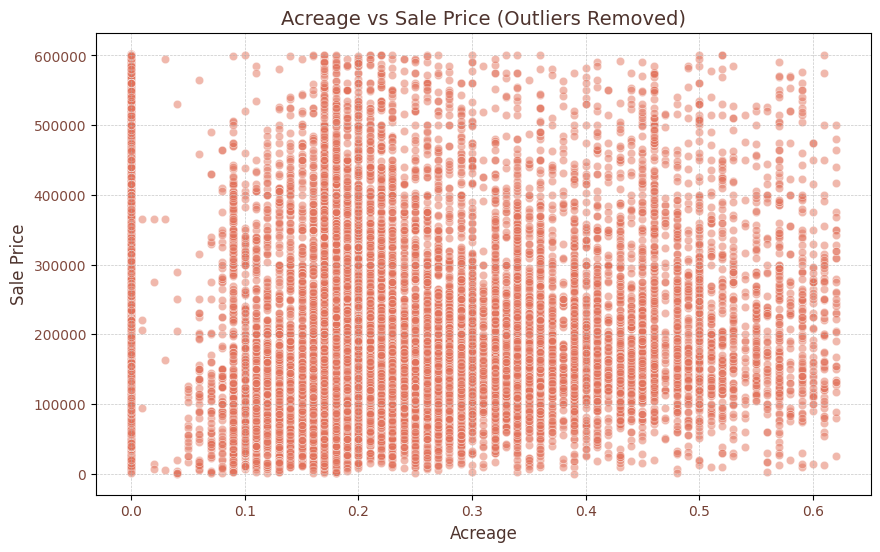

In [25]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df_cleaned = remove_outliers(df, 'SalePrice')
df_cleaned = remove_outliers(df_cleaned, 'Acreage')
plt.figure(figsize=(10,6))
sns.scatterplot(x='Acreage', y='SalePrice', data=df_cleaned, alpha=0.5, color='#E2725B')
plt.title('Acreage vs Sale Price (Outliers Removed)', fontsize=14, color='#4E342E')
plt.xlabel('Acreage', fontsize=12, color='#4E342E')
plt.ylabel('Sale Price', fontsize=12, color='#4E342E')
plt.xticks(color="#743F33")
plt.yticks(color="#814A3E")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()
# Define and apply an IQR-based outlier removal function for SalePrice and Acreage.
# This reduces extreme values that could skew visual patterns and improves interpretability of scatter plots.

## 🚩 Outlier Detection & Removal

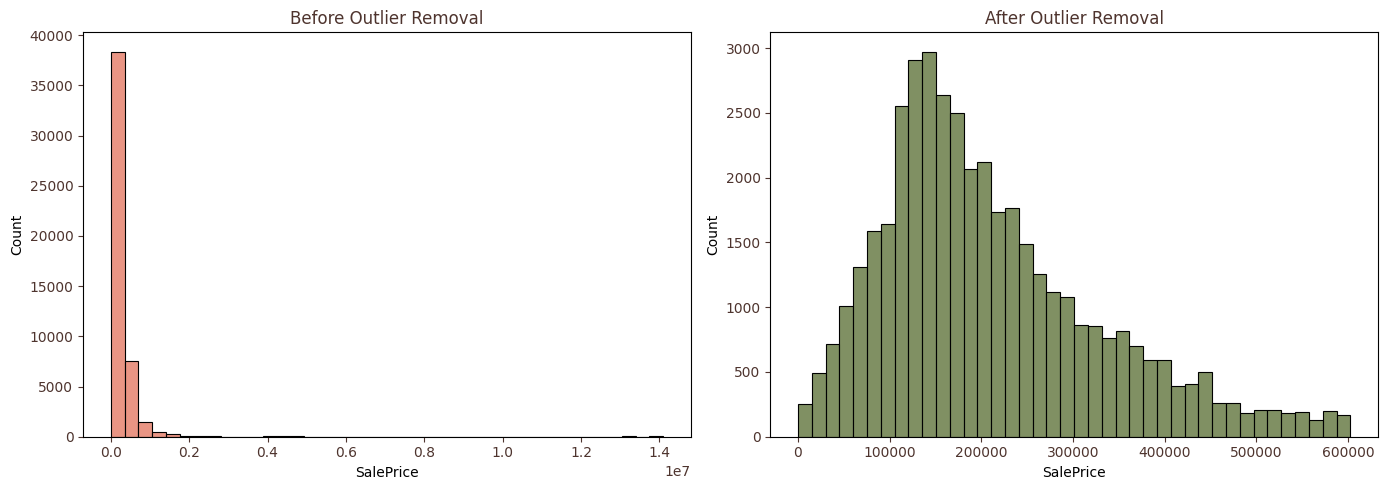

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.histplot(df['SalePrice'], bins=40, color='#E2725B', ax=axes[0])
axes[0].set_title('Before Outlier Removal', color='#4E342E')
sns.histplot(df_cleaned['SalePrice'], bins=40, color='#556B2F', ax=axes[1])
axes[1].set_title('After Outlier Removal', color='#4E342E')
for ax in axes: ax.tick_params(colors='#4E342E')
plt.tight_layout()
plt.show()
# Visualize the distribution of sale prices before and after outlier removal to assess the impact of cleaning on data distribution.

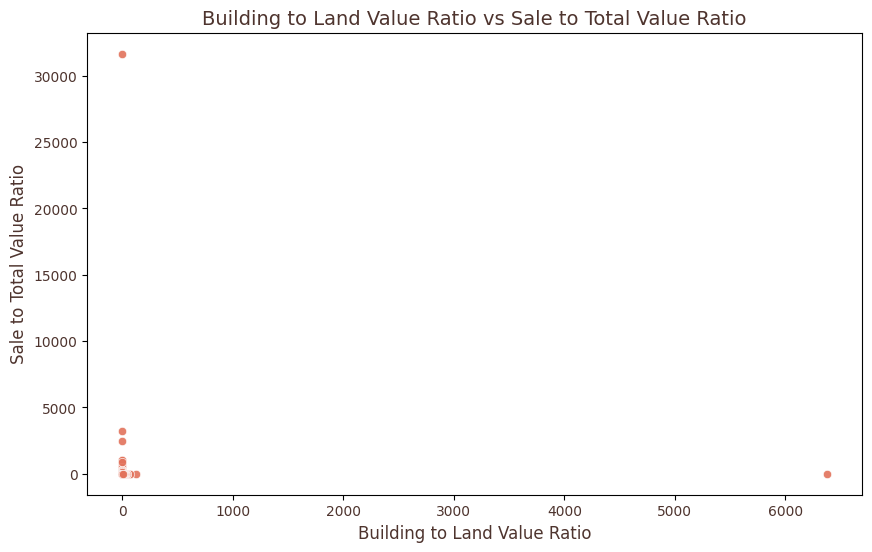

In [27]:
df['BuildingToLandRatio'] = df['BuildingValue'] / df['LandValue']
df['SaleToTotalValue'] = df['SalePrice'] / df['TotalValue']
plt.figure(figsize=(10,6))
sns.scatterplot(x='BuildingToLandRatio', y='SaleToTotalValue', data=df, alpha=0.9, color='#E2725B')
plt.title('Building to Land Value Ratio vs Sale to Total Value Ratio', fontsize=14, color='#4E342E')
plt.xlabel('Building to Land Value Ratio', fontsize=12, color='#4E342E')
plt.ylabel('Sale to Total Value Ratio', fontsize=12, color='#4E342E')
plt.xticks(color='#4E342E')
plt.yticks(color='#4E342E')
plt.show()
# Visualize the relationship between building to land value ratio and sale to total value ratio.
# Explore the relationship between structural investment (building-to-land value ratio)
# and pricing efficiency (sale price relative to total assessed value)



## 🏗️ Feature Engineering

In [28]:
df['PropertyAge'] = df['SaleYear'] - df['YearBuilt']
df['DecadeBuilt'] = (df['YearBuilt'] // 10) * 10


In [29]:
df['LandPerRoom'] = df['Acreage'] / (df['Bedrooms'] + df['FullBath'] + df['HalfBath'])

In [30]:
df['SaleTier'] = pd.qcut(df['SalePrice'], q=4, labels=['Low', 'Mid', 'High', 'Luxury'])

In [31]:
df['OldVacantFlag'] = ((df['SoldAsVacant'] == 'Yes') & (df['PropertyAge'] > 50)).astype(int)

In [32]:
df_trimmed = df[df['BuildingToLandRatio'] <= 10]  # or try 5 for tighter focus

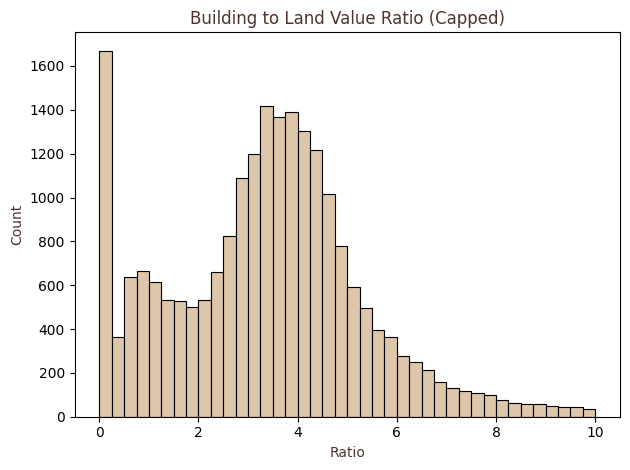

In [33]:
sns.histplot(df_trimmed['BuildingToLandRatio'], bins=40, color='#D2B48C')
plt.title('Building to Land Value Ratio (Capped)', color='#4E342E')
plt.xlabel('Ratio', color='#4E342E')
plt.ylabel('Count', color='#4E342E')
plt.tight_layout()
plt.show()
# Visualize the distribution of the Building to Land Value Ratio after capping to identify extreme values
# Visualize the distribution of the Sale to Total Value Ratio 



Text(0.5, 0, 'Log10(Ratio)')

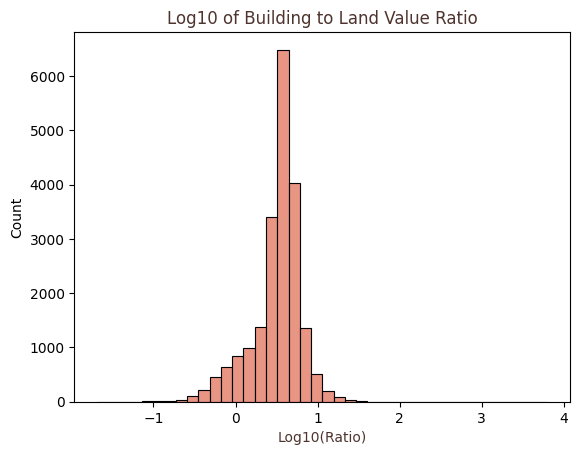

In [34]:
df_log = df[df['BuildingToLandRatio'] > 0]
sns.histplot(np.log10(df_log['BuildingToLandRatio']), bins=40, color='#E2725B')
plt.title('Log10 of Building to Land Value Ratio', color='#4E342E')
plt.xlabel('Log10(Ratio)', color='#4E342E')

In [35]:
print(df['BuildingToLandRatio'].describe())

count    22432.000000
mean         3.885495
std         42.639477
min          0.000000
25%          2.047731
50%          3.495833
75%          4.571190
max       6376.000000
Name: BuildingToLandRatio, dtype: float64


In [36]:
custom_colors = ['#D2B48C', '#556B2F', '#4E342E', '#A0522D', '#8F9779', '#E2725B']

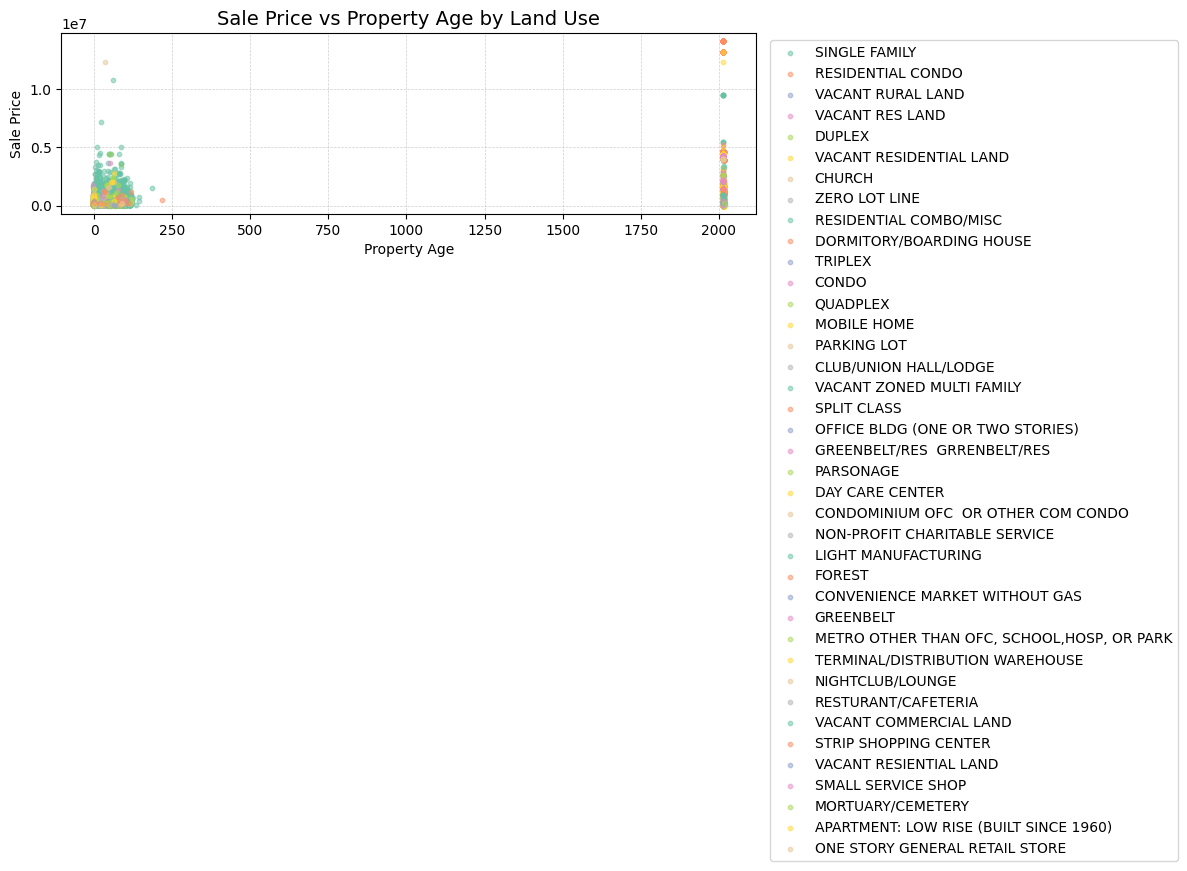

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
landuse_types = df['LandUse'].unique()
colors = plt.cm.Set2.colors

for i, landuse in enumerate(landuse_types):
    temp = df[df['LandUse'] == landuse]
    plt.scatter(
        temp['PropertyAge'], 
        temp['SalePrice'], 
        label=landuse, 
        color=colors[i % len(colors)], 
        s=10, 
        alpha=0.5
    )

plt.title("Sale Price vs Property Age by Land Use", fontsize=14)
plt.xlabel("Property Age")
plt.ylabel("Sale Price")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()
# Visualize the relationship between property age and sale price, colored by land use type.
#“Sale prices consistently skew higher for newer properties, indicating the market’s preference for modern or recently constructed housing, regardless of land use category.”

In [38]:
try:
    df = pd.read_excel(r"D:\salma\analyst\sql\work\nash\Nashville Housing Data cleaned.xlsx", engine='openpyxl')
except Exception as e:
    print("Error loading data:", e)
   
 # Load the cleaned housing data file for analysis.
# Ensures the script continues even if the file is missing or unreadable.



## 📝 Summary & Recommendations

- Most properties sell below $300,000, with a few high-value outliers.
- Sale prices have generally increased over the years.
- Land use and property age significantly impact sale price.
- Outlier removal provides a clearer view of typical property values.